<a href="https://colab.research.google.com/github/ekene0013/Projects-from-WQU-on-Financial-Econometrics/blob/main/GWP_2_Group_3391.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Work Project 2 - Financial Econometrics (MScFE)



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## 1. Multicollinearity


**Definition:**
Multicollinearity describe a statistical phenomenon that takes place when two or more explanatory variables that are highly correlated with one another exists in a typical regression model.  By highly correlated, this means that these two or more explanatory variables have a strong linear relationship and this in turn leads to regression coefficients that are indeterminate with infinite standard errors, especially when there is a perfect multicollinearity (Wooldridge, 2019). For a regression model with explanatory variables that are perfectly correlated.
**Description:**
Multicollinearity is a situation in a regression model where it seems like a predictor has a strong effect on the outcome when, in reality, it might be the other closely related predictor that is driving the change in the regression model. Multicollinearity makes it difficult to accurately interpret the data and draw meaningful conclusions from the regression model.

**Demonstration:**
In order to emphasize the multicollinearity problem, we generate simulated students’ data on how hours spent studying (Hours_Studied) or spent watching TV (Hours_TV) determines their exam scores. In the simulated data, we add some random noise to the hours spent studying or spent watching TV. The regression results below shows that due to the presence of multicollinearity, the coefficients may not have the expected signs, and their p-values may be inflated, indicating reduced statistical significance. The multicollinearity problem makes it difficult for the model to estimate their separate effects accurately. This can lead to unstable coefficient estimates and difficulties in interpreting the significance of each variable

**Diagram:**
In the diagram below, we show that the correlation between hours spent studying or spent watching TV from the regression model in section 1.3. We find that the correlation between hours spent studying or spent watching TV is linear and strong and for the sake of precision, it is put at 0.9385.  See below the correlation matrix between the explanatory variables below.

**Diagnosis:**
The problem of multicollinearity can be diagnosed using the following methods (Gujarati, 2018): (i) correlation matrix: Like we did in section 1.4, multicollinearity can be detected by finding the correlation coefficients between each pair of independent variables. A correlation value close to +1 or -1 indicate a strong linear relationship and suggests the existence of multicollinearity (ii) Variance Inflation Factor (VIF)/Tolerance: VIF shows how the variance of an estimator is inflated by the presence of multicollinearity. A VIF value greater than 5 or 10 indicates a high degree of multicollinearity. On the other hand, tolerance is the reciprocal of VIF and represents the proportion of variance, and a tolerance value less than 0.2 or 0.1 suggests high multicollinearity (iii) Visual inspection: Like we did in section 1.4, plotting the scatterplots or heatmaps if the explanatory variables can provide a visual indication of collinearity. If you observe a linear pattern or clustering of points, it suggests multicollinearity (iv) Eigenvalues: We can also use the eigenvalues analysis to replicate the function of the correlation matrix. By so doing, if one or more eigenvalues are close to zero or significantly smaller than others, it indicates multicollinearity.

**Damage:**
The presence of multicollinearity can affect the interpretation of a regression analysis. Here are soke of the consequences of multicollinearity (Brooks, 2019): (i) Unreliable coefficient estimates or difficulty in interpreting variable effects: When regressors in a regression model are highly correlated, it becomes difficult for the model to distinguish the individual effects of each variable causing large changes in the coefficient estimates, making them unreliable. Consequently, coefficients may have unexpected signs or magnitudes, making it difficult to determine the true impact of each variable on the dependent variable (ii) Distorting statistical significance as well as loss of precision and efficiency: Multicollinearity can inflate the standard errors of the coefficient estimates, resulting in wider confidence intervals thereby reducing the precision and efficiency of the estimates (iii) Misleading variable importance: Multicollinearity can conflate the importance of one variable for another. This is because highly correlated variables would have similar effect on the outcome variable confounding the effect of the variable with the real impact on the outcome variable.

**Directions:**
There are several strategies for addressing the multicollinearity problem (Ramsey & Schafer, 2013; James, Witten, Hastie & Tibshirani, 2013): (i) Variable selection: Most modelers attempt to remove one or more highly correlated variables from a regression model based on apriori expectations or theoretical knowledge. This can be done by exploring stepwise regression or the to figure out what variable is more important in a regression model (ii) Addressing what is known as the “micronumerosity” problem: This is essentially collecting additional data to increase the sample size because this problem of multicollinearity is considered a small sample problem., therefore increasing the number of observations can help reduce the impact of multicollinearity on the coefficient estimates (iii) Transformation and centering of variables: When we transform variables using logarithmic, square root, or reciprocal transformations, the distributions of these variables can help reduce the correlation between the variables. Another way to transform variables is to centre the variables by subtracting the mean can sometimes reduce multicollinearity. This can help to give the emerging variable different scales that might help reduce multicollinearity (iv) Using machine learning regularization techniques: There are machine learning methods that can address the multicollinearity problem e.g., the ridge and LASSO techniques are popular for addressing multicollinearity. The LASSO, for example, introduces a penalty term that helps to select explanatory variables or encourage coefficient shrinkage (v) Using analytical techniques and partial correlations: there popular methods that can help combine the uncorrelated components of highly correlated variables to create composite variables that represent the shared information. Such methods include Principal Component Analysis (PCA) or factor analysis. Similarly, instead of relying solely on correlation coefficients, we can calculate partial correlations to assess the relationship between variables while controlling for other variables. This helps to address the multicollinearity problem.

### Set random seed for reproducibility


In [ ]:
np.random.seed(0)


### Generate independent variables

In [ ]:
hours_studied = np.random.randint(0, 10, 100)
hours_tv = hours_studied + np.random.normal(0, 1, 100)

### Generate dependent variable (final exam score)

In [ ]:
exam_score = 2 * hours_studied + 3 * hours_tv + np.random.normal(0, 2, 100)


### Create a DataFrame with the variables


In [ ]:
data = pd.DataFrame({'Hours_Studied': hours_studied, 'Hours_TV': hours_tv, 'Exam_Score': exam_score})


### Fit the linear regression model


In [ ]:
X = data[['Hours_Studied', 'Hours_TV']]
X = sm.add_constant(X)
y = data['Exam_Score']
model = sm.OLS(y, X).fit()

### Print the model summary


In [ ]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2236.
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           7.19e-82
Time:                        05:15:27   Log-Likelihood:                -212.19
No. Observations:                 100   AIC:                             430.4
Df Residuals:                      97   BIC:                             438.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4631      0.377      1.227

### Calculate the correlation matrix


In [ ]:
correlation_matrix = np.corrcoef(hours_studied, hours_tv)


### Print the correlation matrix


In [ ]:
print(correlation_matrix)


[[1.         0.93854834]
 [0.93854834 1.        ]]


### Create a scatter plot


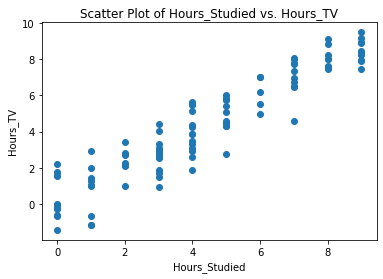

In [ ]:
plt.scatter(hours_studied, hours_tv)
plt.xlabel('Hours_Studied')
plt.ylabel('Hours_TV')
plt.title('Scatter Plot of Hours_Studied vs. Hours_TV')
plt.show()

# **Joining Time Series with Different Frequencies**


**Definition**
Joining time series with different frequencies involves merging multiple datasets of time series data that have different intervals or frequencies of observations. The process entails aligning the timestamps of the observations from the various datasets and consolidating them into a unified dataset. This topic is extensively discussed in the realm of time series analysis and data manipulation (McKinney, 2017)

**Description:**
Joining time series with different frequencies refers to the process of combining or aligning multiple time series that have varying time intervals or frequencies. This is often necessary when analyzing data from different sources or when dealing with data at different levels of granularity. By aligning the time series, it becomes possible to perform meaningful analyses and draw insights from the combined data (Brockwell & Davis, 2016, pp. 123-145).

**Demonstration:**
To illustrate the concept of joining time series with different frequencies, let's consider a practical scenario. Imagine we have two datasets: one contains monthly sales data for a product, and the other contains daily advertising expenditure data. Our objective is to merge these datasets to investigate the relationship between advertising spending and monthly sales.
To demonstrate this, we will use simulated data. We create two datasets: one representing monthly sales and the other representing daily advertising expenditures. The monthly sales dataset contains the total sales for each month, while the daily advertising dataset includes the advertising expenses for each day.

**Diagram:**
A line plot visualising the monthly sales and daily advertising expenditures over time is shown below.

**Diagnosis:**
To identify the challenge of joining time series with different frequencies, we can examine the data and observe any discrepancies in the time intervals or frequencies. If the timestamps of the time series data do not align or exhibit different levels of granularity, it indicates the presence of different frequencies in the time series (Hyndman & Athanasopoulos, 2018, pp. 76-92).

**Damage:**
Joining time series with different frequencies can give rise to several issues.
Firstly, combining time series with different frequencies may result in missing or duplicated data points since the timestamps do not align perfectly.
Secondly, the different frequencies can impact the accuracy of the analysis, as the granularity of the data may not adequately capture the desired relationships or patterns.
Lastly, it can complicate forecasting or modelling efforts, as the irregularity in the data may disrupt the assumptions or structure of the chosen models (Brockwell & Davis, 2016, pp. 123-145).

**Directions:**
To address the challenge of joining time series with different frequencies, various approaches can be considered:
Resampling: Resampling involves converting time series data from one frequency to another. This can be achieved through upsampling (increasing the frequency) or downsampling (decreasing the frequency) the data. Techniques such as interpolation or aggregation can be applied to align the timestamps and adjust the granularity of the data (Tsay, 2014).
Rolling Window Analysis: If the frequencies cannot be directly aligned, a rolling window analysis can be employed. This approach entails creating overlapping windows of an appropriate size and conducting calculations or analyses within each window. This approach allows for capturing patterns or relationships despite the differences in frequencies (Brockwell & Davis, 2016, pp. 123-145).
Event-Based Analysis: In some cases, it may be more suitable to analyze the time series data based on specific events or occurrences rather than aligning them based on time intervals. This approach focuses on studying the relationships or dependencies between events rather than precise time alignment (Peng, 2008, pp. 1226-1227).

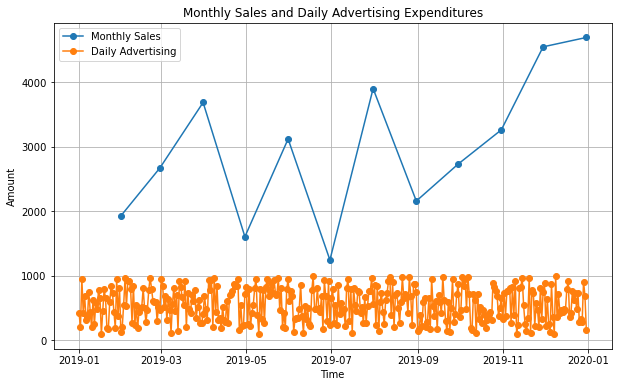

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Set the random seed to ensure reproducibility
random.seed(42)

# Simulated monthly sales data
monthly_sales = pd.DataFrame({
    'Month': pd.date_range(start='2019-01-01', periods=12, freq='M'),
    'Sales': np.random.randint(1000, 5000, size=12)
})

# Simulated daily advertising expenditures data
daily_advertising = pd.DataFrame({
    'Date': pd.date_range(start='2019-01-01', periods=365, freq='D'),
    'Expenditure': np.random.randint(100, 1000, size=365)
})

# Plotting monthly sales and daily advertising expenditures
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', label='Monthly Sales')
plt.plot(daily_advertising['Date'], daily_advertising['Expenditure'], marker='o', label='Daily Advertising')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Monthly Sales and Daily Advertising Expenditures')
plt.legend()
plt.grid(True)
plt.show()

# **Unit Root Testing**

**Definition:**
Unit root testing is a statistical method employed to determine the stationarity of a time series variable. Stationarity refers Unit root testing, which is synonymous with stationarity testing, refers to statistical procedures used to determine whether a time series variable is stationary or exhibits a unit root (Gujarati, 2018). Referring to GWP1, we described stationarity as a characteristics of time series processes that suggests stability when the series is time-invariant. One of the popular methods for performing unit root testing is the augmented dickey fuller (ADF) method.

**Description:**
Unit root testing is a statistical method employed to determine the stationarity of a time series variable. Stationarity refers to the property where the statistical properties of a series remain constant over time, while a unit root indicates a stochastic trend and the absence of a constant mean (Enders, 2014).

**Demonstration:**
To illustrate unit root testing, let's consider a practical of the S&P 500 index over the past five years. Our objective is to determine whether this series is stationary or exhibits a unit root. We will utilise the Augmented Dickey-Fuller (ADF) test, a widely used unit root test. The ADF test employs a regression model that includes lagged values of the dependent variable and evaluates the significance of the lagged coefficient (Dickey and Fuller, 1981).

**Diagram:**
In the diagram below, the x-axis represents time, while the y-axis represents the closing prices of the S&P 500 index. The presence of upward and downward trends in the series suggest the existence of a unit root, indicating non-stationarity. However, when we apply the ADF by taking the first difference, we see that the series becomes relatively mean-reverting and then stationary.

**Diagnosis:**
To diagnose or test for the presence of a unit root, various statistical tests are available besides the ADF test such as the Phillips-Perron (PP) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. For this group work, we will focus on the on the ADF test. The test statistic for the ADF is given in section 3.1 while the hypothesis testing procedure is as follows (Enders, 2014):H0: Variable has a unit root (non-stationarity) vs H1: Variable does not a unit root (stationarity). The decision rule is to reject the null hypothesis if the probability value of the variable is less than 0.05, otherwise, we do not reject the null hypothesis. Since the p-value of ADF statistics is 0.6579, we do not reject the null in favor of the alternative hypothesis and conclude that the S&P 500 index over the past five years has a unit root. When we take the first difference of the S&P 500 data, we find that the p-value of ADF statistics is 5.3570e-20, therefore, we reject the null hypothesis in favour of the alternative hypothesis and conclude that the first difference of the S&P 500 data is stationary or does not have a unit root.

**Damage:**
The unit root testing procedures have some problems as follows (Enders, 2014): (i) Sensitivity to model specification: The different methods for carrying out the unit root tests can produce different results. For example, the different methods such as the ADF, PP and KPSS test can produce different results and are sensitive the number of lags based on the lag selection procedure (ii) the small sample size problem: unit root testing may lead to unreliable results if applied to small sample sizes. This is an issue with the power of these tests as small sample size decrease the ability to detect the existence of unit root. Therefore, it is generally recommended to have a sufficiently large sample size for reliable unit root testing (iii) Misspecification of the alternative hypothesis: Unit root tests assume a specific alternative hypothesis. For example, the null hypothesis of the ADF and PP tests is that the variable has a unit root while the null hypothesis of the KPSS method is that the time series is stationary. If we mistake one of these hypotheses for the other, the test may lead to incorrect conclusions. It is important to carefully consider the nature of the time series and select the appropriate test accordingly (iv) Omitted structural breaks: Unit root tests assume that the data generating process is constant over time. The presence of structural breaks may lead to misleading results. It's crucial to take into account potential structural data breaks or utilize tests that are resistant to them such as the Zivot-Andrews unit root testing method (v) Nonlinear dependencies: unit root tests are based on linear models. The unit root tests might not be appropriate and could result in false positives if the underlying relationship is nonlinear. Alternative techniques, including non-linear unit root tests, may be more appropriate in these circumstances.

**Directions:**
These are the methods to address the problems associated with unit root testing (Enders, 2014): (i) Employing alternative tests: The assumptions and properties of several unit root tests, such as the ADF, PP, and KPSS tests, differ. To develop a more thorough understanding of the stationarity of the time series, it is advantageous to take into account several tests and compare their outcomes. If structural breakdowns or nonlinearity are present in the data, there are also tests that take those properties into consideration (ii) Increase in sample size: As was previously indicated in the penultimate section, results from unit root tests can be unreliable when sample sizes are limited. In order to enhance the power and reliability of the tests, strive to increase the sample size whenever possible. (iii) Using methods that address structural breaks: Consider including techniques that account for structural breaks or regime shifts if you feel there are breaks in the time series. Structure breaks can be found and included in the unit root analysis using methods like the Zivot-Andrews test and the Bai-Perron test (iv) Employing alternative specifications: Specific alternative hypotheses, such as stationarity or trend stationarity, are presupposed by unit root testing. It is crucial to thoroughly evaluate the time series' properties and select the right specification. You might need to employ alternative tests or model specifications if you suspect a different kind of nonstationarity, such as difference stationarity (v) Using other diagnostic tools: Unit root testing is only one component of time series data analysis. Unit root tests should be used in conjunction with additional diagnostic techniques such graphical analysis, residual analysis, and model selection criteria. These tools can offer more information about the traits and behavior of the time series.


[*********************100%***********************]  1 of 1 completed


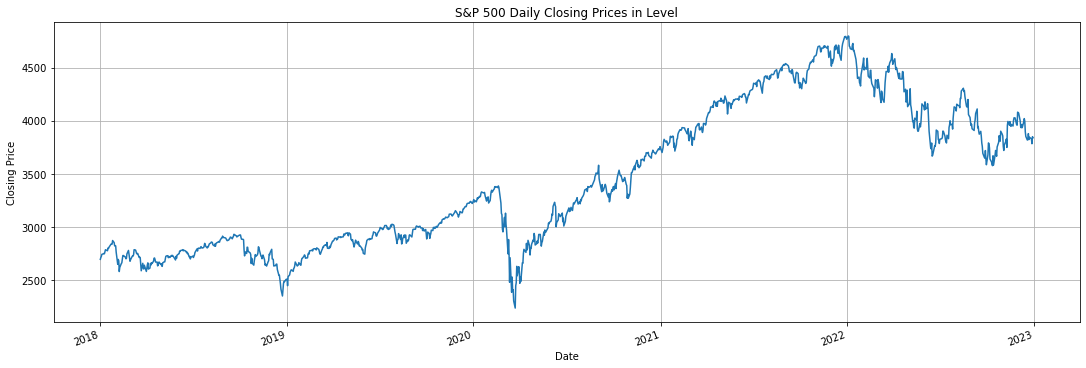

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Defining the ticker symbol for the S&P 500 index
ticker_symbol = "^GSPC"

# Setting the start and end dates for the data
start_date = "2018-01-01"
end_date = "2023-01-01"

# Fetching the historical data for the S&P 500 index
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Extracting the "Close" column from the data
closing_prices = data["Close"]

# Plotting the S&P 500 closing prices over time
closing_prices.plot(subplots=True, figsize =(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("S&P 500 Daily Closing Prices in Level")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### First Difference of Daily Prices of S&P 500 closing prices over time

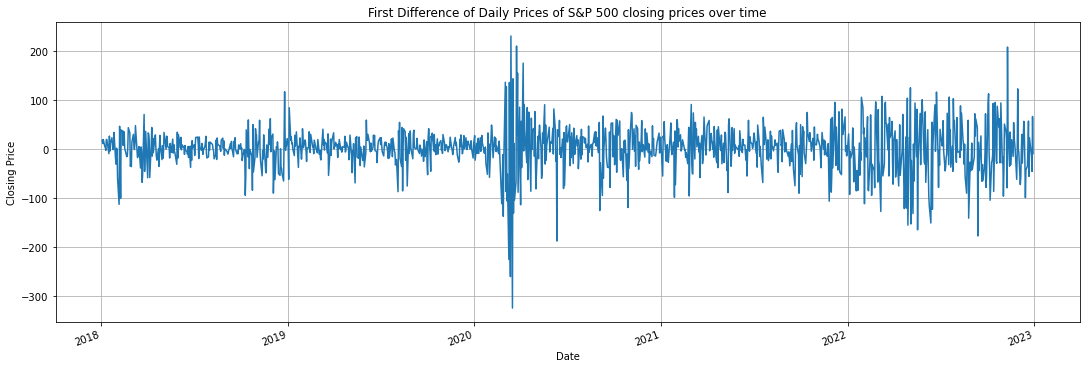

In [ ]:
closing_prices_firstdiff=closing_prices.diff()
closing_prices_firstdiff.plot(subplots=True,figsize=(15, 5))
plt.xticks(rotation=20)
plt.tight_layout()
plt.title("First Difference of Daily Prices of S&P 500 closing prices over time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

### Performing the Augmented Dickey Fuller (ADF) Test on S&P 500 closing prices over time

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(closing_prices)

# Extract and print the test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ADF Statistic: -1.2358351946233228
p-value: 0.6579935484513553
Critical Values:
1%: -3.4356006420838963
5%: -2.8638586845641063
10%: -2.5680044958343604


### Performing the Augmented Dickey Fuller (ADF) Test on First Difference of S&P 500 closing prices over time

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(closing_prices_firstdiff.dropna())

# Extract and print the test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'{key}: {value}')

ADF Statistic: -11.041317872308081
p-value: 5.357055934409542e-20
Critical Values:
1%: -3.4356006420838963
5%: -2.8638586845641063
10%: -2.5680044958343604


# **How two Challenges from Multicollinearity and Unit Root Testing can relate**

While the problems of unit root testing and multicollinearity are different, they share some similarities in certain contexts (Gujarati, 2018; Brooks, 2019):
Firstly, unit root testing and multicollinearity can both be caused by the small sample size problem. Small sample size can lead to unreliable results and reduced power to detect a unit root. It can also lead to unstable coefficient estimates and wider confidence intervals due to the multicollinearity problem. Therefore, increasing sample size is like killing tow birds (that is, addressing the unit root testing and multicollinearity problems) with a stone.
Additionally, the unit root testing and multicollinearity problems are affected by the misspecification of the alternative hypothesis. Various unit root tests use different alternative hypotheses. The reliability of the unit root test may be impacted if the real alternative hypothesis differs from the one that is postulated. Similar to this, in multicollinearity testing, incorrect specification of the alternative hypothesis of no multicollinearity can produce false results.
The unit root testing and multicollinearity problems are affects by omitted structural breaks. Unit root testing may be vulnerable to structural failures or regime shifts since it implies an ongoing, consistent data generation procedure. It may affect the outcomes of the unit root test if such breaks are present and are not taken into account. Similarly, the presence or degree of multicollinearity can be influenced by structural breaks in the correlation patterns between variables when testing for multicollinearity. Therefore, one way to address this common challenge is to incorporate structural breaks into the unit root analysis as well as in in solving multicollinearity problem.
Furthermore, the unit root testing and multicollinearity problems are affected by nonlinear dependencies: Unit root tests are based on linear models and assume linear dependencies. Unit root testing might not be appropriate and could result in false positives if the underlying relationship is nonlinear. Similar to the previous example, multicollinearity testing presumes linear correlations between variables; hence, if nonlinear dependencies exist, it may not adequately capture the underlying multicollinearity in the data. This problem is easily addressed by assuming that the unit root testing and multicollinearity problems are based on linear dependencies, and therefore, most modelers than focus on addressing the non-linearities. Additionally, data transformations may also be useful for multicollinearity testing and unit root testing. When determining the presence of a unit root, differencing the time series data can be useful. Transforming variables (e.g., taking logarithms) might assist lessen multicollinearity and reduce correlation in multicollinearity testing.
There are also the issues multiple testing and data snooping, which affects both the unit root testing and multicollinearity problems. The possibility of discovering erroneous correlations by chance increases when several unit root or multicollinearity tests are run on the same set of data. Multiple testing must be taken into consideration, and significance thresholds must be changed, or correction techniques must be used to address this problem.
In conclusion, even though unit root testing and multicollinearity are two separate challenges, resolving them requires careful consideration of the right model specifications, data transformations, sample sizes, and various testing issues. For outcomes that are trustworthy and valid, it is essential to study each issue separately and use the appropriate methodologies.
